In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Homework #2

![slider crank diagram: two links connected to a piston and the ground](../images/slider-crank.svg)

Consider the slider-crank shown above. Two links are connected by pins to the ground at $A$ and the piston at $C$. Link AB can rotate around $A$ and link BC can rotate around $C$ and the piston maintains contact with the ground. 

Consider the following kinematic properties:

- link AB $L_1 = 1~m$
- link BC $L_2 = 1~m$
- the angle of link AB rotates at a constant $\dot{\theta}_1 = 1~rad/s$


__1.__ How many degrees of freedom does the slider-crank have? _How many degrees of freedom and how many constraints?_

__2.__ The system begins to move with both links horizontal e.g. $\theta_1 = \theta_2 = 0^o$ and $\mathbf{r}_c = 2~m \hat{i}$. Find the positions of $A,~B,~and~C$ for one full rotation, $t = 0...2\pi$.

__3.__ Plot the positions of $B~and~C$ vs time. 

## Question 1

3 bodies --> 6 DOF * 3 = 18 $\mathrm{DOF}_{unconstrained}$ $\\$
Planar Constraint --> 3 DOF * 3 = 9 DOF $\\$
3 Revolute Joints (Constraint) --> 2 DOF * 3 = 6 DOF $\\$
1 Prismatic Joint (Constraint) --> 2 DOF * 1 = 2 DOF $\\$

Total degrees of freedom for slider-crank= 18 - 17 = 1 DOF $\\$
Total degrees of freedom = 18 $\\$
Total Constraints = 9 + 6 + 2 = 17 

In [2]:
#Question 2
L_AB = 1
L_BC = 1
pi = np.pi

t = theta_1 = np.linspace(0, 2*pi)

#positions of A, B, C
A = np.zeros([2,theta_1.shape[0]])
B = np.array([L_AB*np.cos(theta_1),L_AB*np.sin(theta_1)])
C = np.array([B[0]+ np.sqrt(L_BC**2 - B[1]**2),np.zeros_like(theta_1)])

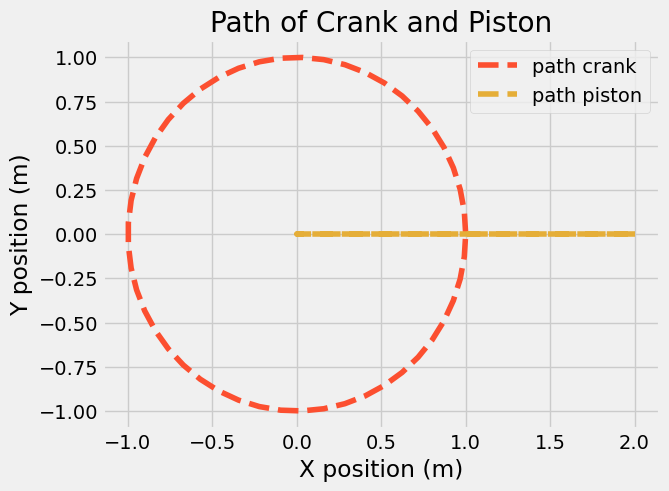

In [3]:
fig, ax = plt.subplots()

line, = ax.plot([], [],'ro-')
line2, = ax.plot([], [],'o-')
line3, = ax.plot([], [],'ko-')
line4, = ax.plot([], [],'ko-')

ax.set_title('Path of Crank and Piston')
ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.plot(B[0,:],B[1,:],'--', label = 'path crank')
ax.plot(C[0,:],C[1,:],'--', label = 'path piston')
plt.legend();

In [4]:
from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return (line, line2, line3, line4,)



In [5]:
def animate(i):
    line.set_data([B[0, i]], [B[1, i]])
    line2.set_data([C[0, i]], [C[1, i]])
    line3.set_data([A[0, i], B[0, i]], 
                    [A[1, i], B[1, i]])
    line4.set_data([B[0, i], C[0, i]], 
                    [B[1, i], C[1, i]])
                    
    return (line, line2, line3, line4)

In [6]:
anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(theta_1), interval=100, 
                               blit=True)

HTML(anim2.to_html5_video())



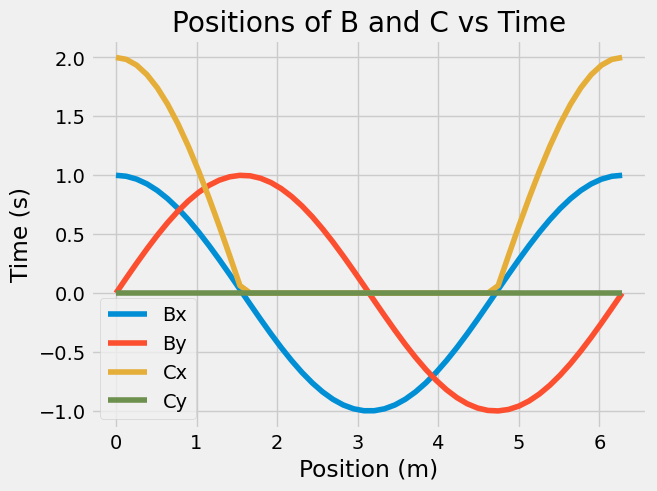

In [7]:
#Question 3

#time is equal to 2*pi as defined above

fig2, ax2 = plt.subplots()

ax2.plot(t, B[0],label='Bx')
ax2.plot(t, B[1],label='By')
ax2.plot(t, C[0],label='Cx')
ax2.plot(t, C[1],label='Cy')
plt.title('Positions of B and C vs Time')
plt.xlabel('Position (m)')
plt.ylabel('Time (s)')
plt.legend();